<a href="https://colab.research.google.com/github/TamilarasiAnbazhagan/Problem-Solving/blob/master/New_note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import keras
import glob
import cv2
import os

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
currency_images = []
labels = [] 
for currency_dir_path in glob.glob("/content/drive/My Drive/Project/new note/train_data/*"):
    currency_label = currency_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(currency_dir_path, "*.jpg")):
        image = cv2.imread(image_path, cv2.IMREAD_COLOR)
        image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY) 
        currency_images.append(image)
        labels.append(currency_label)
currency_images = np.array(currency_images)
currency_images = currency_images.reshape(len(currency_images),-1)
labels = np.array(labels)

In [0]:
print(np.shape(currency_images))

(321, 12100)


In [0]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
#clf = svm.SVC(decision_function_shape='ovo')

clf=RandomForestClassifier(max_depth=9, random_state=0)
clf.fit(currency_images, labels)
#clsvm.fit(currency_images, labels)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

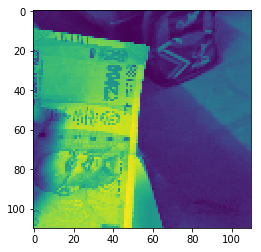

In [0]:
import matplotlib.pyplot as plt
validation_currency_images = []
validation_labels = [] 
for currency_dir_path in glob.glob("/content/drive/My Drive/Project/new note/test_data/*"):
    currency_label = currency_dir_path.split("/")[-1]
    for image_path in glob.glob(os.path.join(currency_dir_path, "*.jpg")):
        image = cv2.imread(image_path)
        image = cv2.resize(image, (110, 110))
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        #image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        validation_currency_images.append(image)
        validation_labels.append(currency_label)
validation_currency_images = np.array(validation_currency_images)
plt.imshow(validation_currency_images[18])
plt.show()
#cv2.imshow(validation_fruit_images[1])
validation_currency_images = validation_currency_images.reshape(len(validation_currency_images),-1)
validation_labels = np.array(validation_labels)

In [0]:
print(np.shape(validation_currency_images))

(64, 12100)


In [0]:
count=0 
total = np.shape(validation_currency_images)[0]
print(total)
for i in range(total):
    check=clf.predict([validation_currency_images[i]])
    if check[0] == validation_labels[i] :
        count += 1
print(count)
print("Accuracy is ", count/total)

64
24
Accuracy is  0.375


In [0]:
clsvm = svm.SVC()
clsvm.fit(currency_images, labels)
count=0 
total = np.shape(validation_currency_images)[0]
print(total)
for i in range(total):
    check=clsvm.predict([validation_currency_images[i]])
    if check[0] == validation_labels[i] :
        count += 1
print(count)
print("Accuracy is ", count/total)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


64
11
Accuracy is  0.171875


In [0]:
from sklearn.tree import DecisionTreeClassifier
clt=DecisionTreeClassifier()
clt.fit(currency_images, labels)
count=0 
total = np.shape(validation_currency_images)[0]
print(total)
for i in range(total):
    check=clt.predict([validation_currency_images[i]])
    if check[0] == validation_labels[i] :
        count += 1
print(count)
print("Accuracy is ", count/total)

64
19
Accuracy is  0.296875


In [0]:
from sklearn.neighbors import KNeighborsClassifier
cln=KNeighborsClassifier(n_neighbors=3)
cln.fit(currency_images, labels)
count=0 
total = np.shape(validation_currency_images)[0]
print(total)
for i in range(total):
    check=cln.predict([validation_currency_images[i]])
    if check[0] == validation_labels[i] :
        count += 1
print(count)
print("Accuracy is ", count/total)

64
24
Accuracy is  0.375


In [0]:
from sklearn.linear_model import SGDClassifier
clsgd=SGDClassifier(loss='modified_huber')
clsgd.fit(currency_images, labels)
count=0 
total = np.shape(validation_currency_images)[0]
print(total)
for i in range(total):
    check=clsgd.predict([validation_currency_images[i]])
    if check[0] == validation_labels[i] :
        count += 1
print(count)
print("Accuracy is ", count/total)

64
22
Accuracy is  0.34375


In [0]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

In [0]:
train_folder= "/content/drive/My Drive/Project/new note/train_data"
test_folder="/content/drive/My Drive/Project/new note/test_data"
val_folder="/content/drive/My Drive/Project/new note/val_data"

In [0]:
cnn = Sequential()

    # Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(110, 110, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 3rd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 3rd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 4th Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 4th Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 6))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen =  ImageDataGenerator(rescale= 1./255)

training_set = train_datagen.flow_from_directory("/content/drive/My Drive/Project/new note/train_data",
                                                 target_size=(110,110),
                                                 batch_size=15)
test_set= test_datagen.flow_from_directory("/content/drive/My Drive/Project/new note/test_data",
                                            target_size= (110,110),
                                            batch_size=15)
validation_generator= test_datagen.flow_from_directory("/content/drive/My Drive/Project/new note/val_data",
                                           target_size=(110,110),
                                            batch_size=15)

Found 321 images belonging to 6 classes.
Found 64 images belonging to 6 classes.
Found 59 images belonging to 6 classes.


In [0]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 24,
                         epochs =10,
                         validation_data = validation_generator,
                         validation_steps = 8)




Epoch 1/10





24/24 [==============================] - 67s 3s/step - loss: 0.4913 - acc: 0.8241 - val_loss: 0.4577 - val_acc: 0.8333
Epoch 2/10
24/24 [==============================] - 58s 2s/step - loss: 0.4482 - acc: 0.8333 - val_loss: 0.4714 - val_acc: 0.8333
Epoch 3/10
24/24 [==============================] - 57s 2s/step - loss: 0.4108 - acc: 0.8384 - val_loss: 0.4836 - val_acc: 0.8107
Epoch 4/10
24/24 [==============================] - 60s 2s/step - loss: 0.3964 - acc: 0.8384 - val_loss: 0.4795 - val_acc: 0.8277
Epoch 5/10
24/24 [==============================] - 57s 2s/step - loss: 0.3527 - acc: 0.8505 - val_loss: 0.4374 - val_acc: 0.8277
Epoch 6/10
24/24 [==============================] - 56s 2s/step - loss: 0.3209 - acc: 0.8711 - val_loss: 0.5962 - val_acc: 0.8051
Epoch 7/10
24/24 [==============================] - 57s 2s/step - loss: 0.3042 - acc: 0.8771 - val_loss: 0.3846 - val_acc: 0.8418
Epoch 8/10
24/24 [==============================] - 56s 2s/step - loss: 0.2696 - a

In [0]:
test_accu=cnn.evaluate_generator(test_set, steps=4)
print('The testing accuracy is :',test_accu[1]*100, '%')

The testing accuracy is : 82.22222328186035 %


In [0]:
#img = image.load_img("/content/drive/My Drive/Project/new note/test_data/200.jpg", target_size=(110, 110))
image = cv2.imread("/content/drive/My Drive/Project/new note/test_data/200.jpg")
image = cv2.resize(image, (110, 110))

images = np.vstack([x])
classes = model.predict_classes(images, batch_size=1)
print (classes[0])

AttributeError: ignored